<a href="https://colab.research.google.com/github/houdhoud15/mini-projet-nlp/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.5 MB/s eta 0:12:50tcmalloc: large alloc 1147494400 bytes == 0x55cfc9faa000 @  0x7fa6a5288615 0x55cf914e702c 0x55cf915c717a 0x55cf914e9e4d 0x55cf915dbc0d 0x55cf9155e0d8 0x55cf91558c35 0x55cf914eb73a 0x55cf9155df40 0x55cf91558c35 0x55cf914eb73a 0x55cf9155a93b 0x55cf915dca56 0x55cf91559fb3 0x55cf915dca56 0x55cf91559fb3 0x55cf915dca56 0x55cf91559fb3 0x55cf914ebb99 0x55cf9152ee79 0x55cf914ea7b2 0x55cf9155de65 0x55cf91558c35 0x55cf914eb73a 0x55cf9155a93b 0x55cf91558c35 0x55cf914eb73a 0x55cf91559b0e 0x55cf914eb65a 0x55cf91559d67 0x55cf91558c35
     |█████████████████               | 1055.7 MB 1.4 MB/s eta 0:11:17tcmalloc: large alloc 1434370048 bytes == 0x55d00e600000 @  0x7fa6a5288615 0x55cf914e702c 0x55cf915c717a 0x55cf914e9e4d 0x55cf915dbc0d 0x55cf9155e0d8 0x55cf91558c35 0x55cf914eb73a 0x55cf9155df40 0x55cf91558c35 0x55cf914eb73a 0x55cf9155a93b 0x55cf915dca56 0x55cf91559f

In [2]:
!pip install transformers 

     |████████████████████████████████| 2.8 MB 5.2 MB/s 
     |████████████████████████████████| 50 kB 5.0 MB/s 
     |████████████████████████████████| 636 kB 53.8 MB/s 
     |████████████████████████████████| 895 kB 65.5 MB/s 
     |████████████████████████████████| 3.3 MB 39.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


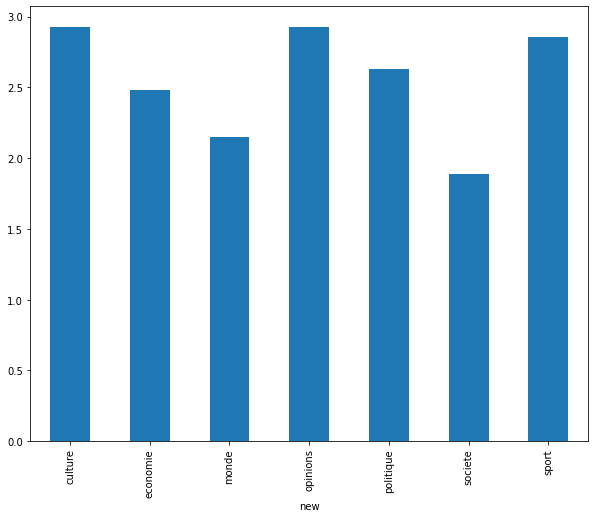

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

hespress_url = 'https://fr.hespress.com/'
news = ['politique','economie', 'sport','societe','monde','culture','opinions']

news_tables = {}
for new in news:
    url = hespress_url + new

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='listing')
    news_tables[new] = news_table
     

parsed_data = []

for new, news_table in news_tables.items():

    for row in news_table.findAll('h3'):

        title = row.text

        parsed_data.append([new, title])

dataframe = pd.DataFrame(parsed_data, columns=['new', 'title'])

def sentiment_score(title):
    tokens = tokenizer.encode(title, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

dataframe['sentiment'] = dataframe['title'].apply(lambda x: sentiment_score(x[:512]))


plt.figure(figsize=(10,8))
mean_df = dataframe.groupby(['new']).mean()
mean_df=mean_df.unstack()
mean_df = mean_df.xs('sentiment').transpose()
mean_df.plot(kind='bar')
plt.show()
